# Modelling and Grid Search Demo

This notebook demonstrates how to use the code in LdaLogging.py and LdaGridSearch.py. Because these models take a while to train, it trains models on a small toy example. 

# Set-up

In [55]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from imp import reload
import logging

#GENSIM IMPORTS
from gensim.corpora.dictionary import Dictionary

In [56]:
#NAVIGATE TO SCRIPTS FOLDER TO GET FILEPATHS.PY
#Will all be correct except absolute_path because demos folder is nested at same level as scripts folder

filepaths_path = os.path.join(os.path.dirname(os.path.abspath("")),"scripts\\filepaths")
sys.path.insert(0,os.path.dirname(filepaths_path))
from filepaths import code_path
sys.path.insert(0,code_path)
import LdaLogging
import LdaGridSearch
import LdaOutputPerTopicMetrics
import LdaOutput

For saving models:

In [57]:
model_path = os.path.abspath("demo_models")


# TOY EXAMPLE

Below I create a simple corpus with 3 themes and 7 documents each:
* statistics 
* horse racing 
* olympics 

I chose these because they are themes with some potentially overlapping words

In [58]:
texts1 = [["statistic","probability","equation","model"],
         ["equation","equation","equation","model"],
         ["survey","probability","weight","odds","estimate"],
         ["odds","ratio","odds","weight"],
         ["statistic","survey","regression","survey"],
         ["regression","model","statistic","statistic","statistic","probability"],
         ["probability","model","estimate"]
         ] 

texts2 = [["horse","race","weight","odds","win","kentucky"],
         ["win","win","derby","odds","track"],
         ["race","track","long","odds","horse","horse","track"],
         ["track","record","race","horse","sire","horse"],
         ["horse","horse","race","derby","dirt","horse"],
         ["win","sire","track","turf","record","sire","sire"],
         ["kentucky","derby","dirt","race","horse","track"]
         ]

texts3 =[["olympic","sport","race","record","team"], 
         ["olympic","gold","silver","win","race","olympic","swim"],
         ["olympic","horse","medal"], 
         ["record","weight","gold","sport","team","team","country","olympic"],
         ["gold","medal","win","team"],
         ["country","record","gold","win"],
         ["country","swim","gold","swim","swim"]
         ]

texts = texts1 + texts2 + texts3

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

print(len(dictionary.keys())," words in vocabulary")
print(len(texts), " documents")

29  words in vocabulary
21  documents


Uncomment this code if you would like logging to the console:

In [59]:
# #create instance completely separate from the above
# logger = logging.getLogger() 

# #create handler and set its properties
# handler = logging.StreamHandler()
# handler.setLevel(logging.INFO)
# formatter = logging.Formatter("%(asctime)s : %(levelname)s - %(message)s")
# handler.setFormatter(formatter)

# #add handler to logger
# logger.addHandler(handler) 

# 1. Train a single, logged, model using LdaLogging

Set parameters, including a callback list which specifies which metrics I want to be logged

In [60]:
# Set training parameters.
chunksize = 15
passes = 20
iterations = 100
eval_every = None  # Don't evaluate model perplexity 
per_word_topics = False 
random_state = 175
alpha = "auto" #use newton-raphson updates to learn this
eta = 0.1 #choosing something smallish
num_topics = 3  #the true value
callback_list = ["coherence","convergence","perplexity"]

Train model. Note the resolve_name and raise_error options. Copied from documentation:

        
        1. if resolve_name is True, function will amend filename with _1, _2, _3 etc. until finds 
        one that does not already exist and then use that one. Will do this regardless
        of the value of raise_error
        
        2. if resolve_name is False, there is the possibility of trying to create a log 
        file that already exists. If proposed filename does not already exist, function
        simply creates that log. If it does already exist and raise_error = True, 
        function will raise error. If it does already exist and raise_error = False,
        then existing log file will be overridden
       
Here I have set it up to override existing files. This is mainly for purpose of not generating large numbers of logs when running thise notebook. In general, I recommend the resolve_name = True option.
    

In [61]:
model3 = LdaLogging.LdaModelLogged(log_filename = "3TopicModel",
                               log_outpath = model_path,
                               resolve_name = False, 
                               raise_error = False, 
                               save_model = False, #not bothering to save it
                               model_fname = "3TopicModel", #this won't be used
                               model_outpath = model_path, 
                               corpus = corpus,          #data
                               id2word = dictionary,     #data 
                               chunksize = chunksize,  
                               alpha = alpha,
                               eta = eta,
                               num_topics = num_topics,
                               iterations=iterations,
                               passes = passes,
                               eval_every = eval_every,
                               per_word_topics = per_word_topics,
                               random_state = random_state,
                               callback_list = callback_list,
                               topn_coherence = 5) #use top 5 words in topic for judgements of coherence

A simple built-in way to view the topics. The model is pretty successful in identifying the themes.

In [62]:
model3.top_topics(corpus, topn = 5)

[([(0.1773522, 'gold'),
   (0.15312085, 'olympic'),
   (0.14223795, 'swim'),
   (0.118006505, 'team'),
   (0.10712347, 'country')],
  -3.3796839050048306),
 ([(0.1932697, 'win'),
   (0.17298391, 'horse'),
   (0.089211546, 'weight'),
   (0.08849126, 'race'),
   (0.08605341, 'track')],
  -3.6654356983083196),
 ([(0.17963599, 'statistic'),
   (0.14484714, 'equation'),
   (0.14484714, 'model'),
   (0.14484696, 'probability'),
   (0.11005808, 'survey')],
  -5.662771730565176)]

# 2. Train a second model for comparison

I reuse the code above but now set $K$ to 4

In [63]:
model4 = LdaLogging.LdaModelLogged(log_filename = "4TopicModel",
                               log_outpath = model_path,
                               resolve_name = False, 
                               raise_error = False, 
                               save_model = False, #not bothering to save it
                               model_fname = "4TopicModel", #this won't be used
                               model_outpath = None,
                               corpus = corpus,          #data
                               id2word = dictionary,     #data 
                               chunksize = chunksize,  
                               alpha = alpha,
                               eta = eta,
                               num_topics = 4,
                               iterations=iterations,
                               passes = passes,
                               eval_every = eval_every,
                               per_word_topics = per_word_topics,
                               random_state = random_state,
                               callback_list = callback_list,
                               topn_coherence = 5) #use top 5 words in topic for judgements of coherence

In [64]:
model4.top_topics(corpus, topn = 5)

[([(0.14426754, 'olympic'),
   (0.13052694, 'gold'),
   (0.11118332, 'team'),
   (0.11048045, 'win'),
   (0.098606594, 'record')],
  -0.8411832675635911),
 ([(0.22825637, 'horse'),
   (0.15610707, 'track'),
   (0.12624411, 'race'),
   (0.081862666, 'win'),
   (0.080126, 'derby')],
  -1.0406532988870454),
 ([(0.16795075, 'statistic'),
   (0.13542491, 'probability'),
   (0.13542488, 'model'),
   (0.13542485, 'equation'),
   (0.10289907, 'survey')],
  -5.801401166677165),
 ([(0.3365369, 'swim'),
   (0.15009382, 'weight'),
   (0.14341415, 'country'),
   (0.12753479, 'gold'),
   (0.07397333, 'odds')],
  -10.619375725020662)]

# 3.  Visualize convergence

To visualize only one metric, change metric argument below to one of  'perplexity','Perplexity', 'coherence','Coherence',
'convergence','Convergence'. The capitalized versions yield the same as lowercase version - just something to make function insensitive to this choice.

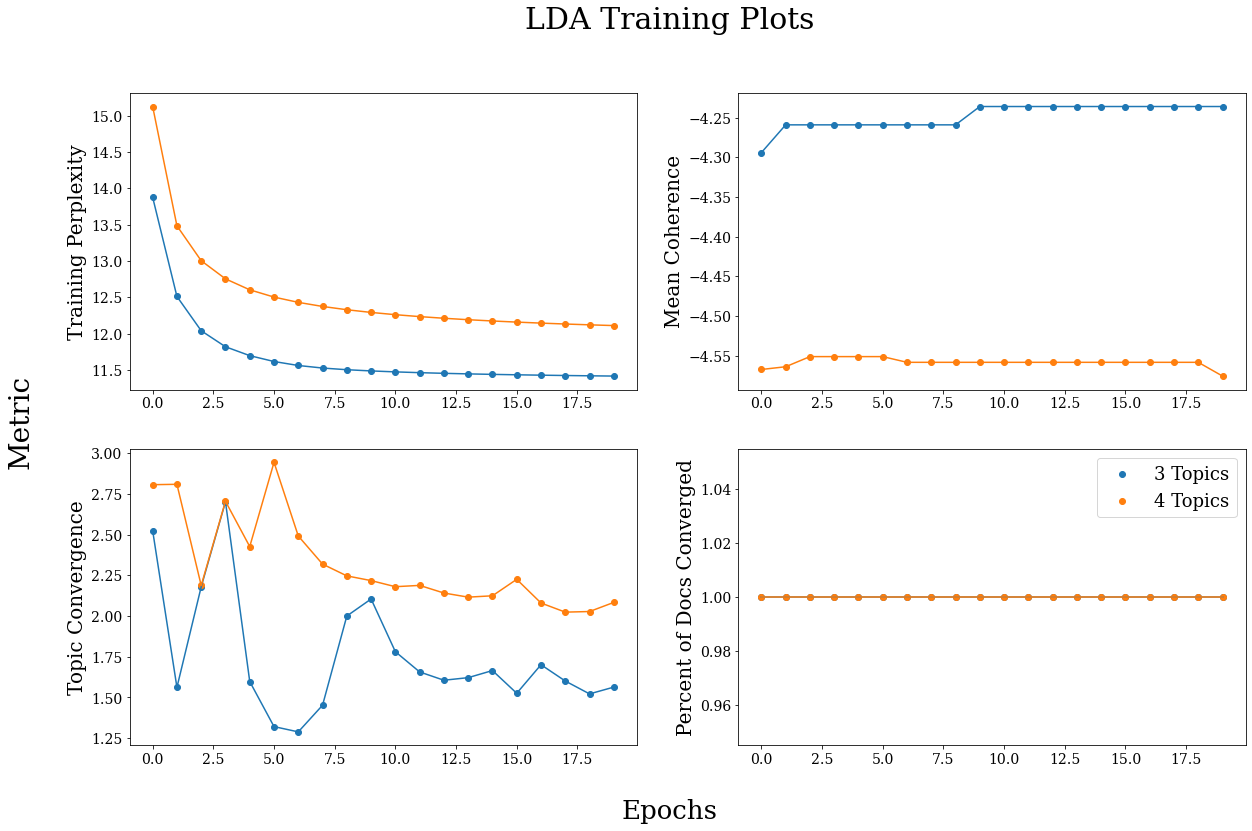

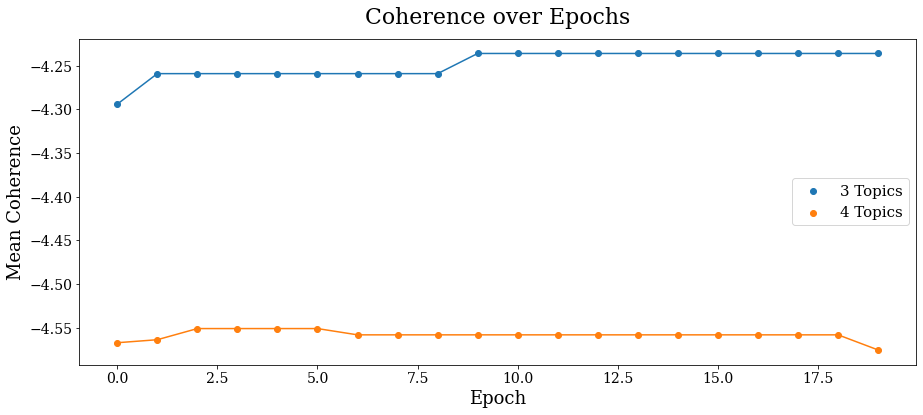

In [65]:
fnames = ["3TopicModel","4TopicModel"]
fnames = [os.path.join(model_path, name) for name in fnames]
_ = LdaLogging.metric_comparison_plot(filenames_lst = fnames,
                                     metric = "all",
                                     path = None,
                                     labels = ["3 Topics", "4 Topics"],
                                     save_fig = False)


_ = LdaLogging.metric_comparison_plot(filenames_lst = fnames,
                                     metric = "coherence",
                                     path = None,
                                     labels = ["3 Topics", "4 Topics"],
                                     save_fig = False)

# 4. Compare Per-Topic Metrics for Two Models

See LdaOutputPerTopicMetrics.py

**Note:** similar plots can be produced by different functions in LdaGridSearch but those are specifically written for grid search output. The procedure below will work for any list of LDA models.

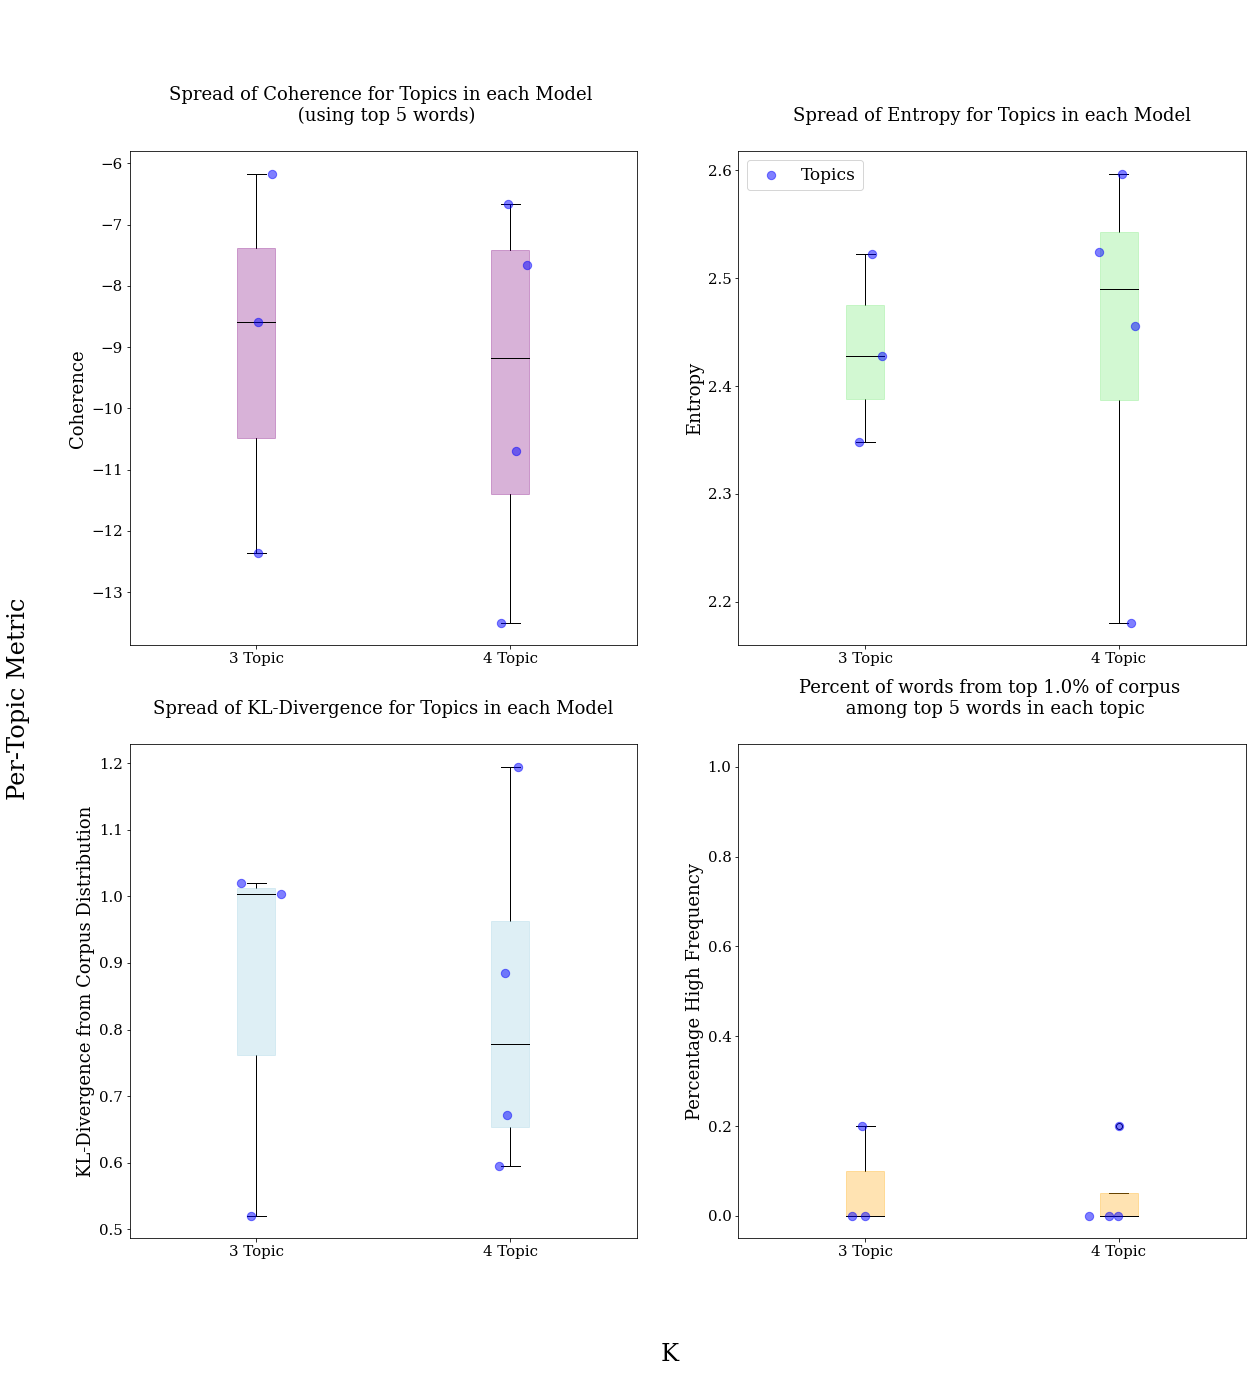

In [66]:
metric = "all" #can change to "kl","coherence","entropy", or "phf"
topn_phf = 5  #for so small a corpus, this will not be very meaningful!
thresh = 0.01
topn_coherence = 5

model_list = [model3, model4]
labels = ["3 Topic","4 Topic"]


model_summaries = LdaOutput.topic_summarizer(model_list = model_list,
                                             metric = metric,
                                             topn_coherence = topn_coherence,
                                             topn_phf = topn_phf,
                                             thresh = thresh,
                                             corpus = corpus,
                                             dictionary = dictionary,
                                             save_array = False)

LdaOutputPerTopicMetrics.visualize_spread(model_summaries = model_summaries, 
                           metric = metric, 
                           labels = labels,
                           topn_coherence = topn_coherence,
                           topn_phf = topn_phf, #used for labeling
                           thresh = thresh, #used for labeling
                           xlabel = "K",
                           plot_points = True,
                           color_point = "blue", #only used if plotting an individual metric
                           color_box = "cyan", #only used if plotting an individual metric
                           alpha_point = 0.3, #only used if plotting an individual metric
                           alpha_box = 0.5, #only used if plotting an individual metric
                           save_fig = False)
                                 

# 5. GRID SEARCH over $\eta$ and $K$

**Note** LdaGridSearch contains a function **GridEta** that in principle allows you to search over $\eta$ values for a fixed $K$. However, this function is really written as a helper for $GridEtaTopics$ and working with its output requires some additional, more manual manipulation for this reason. I therefore recommend that to search over $\eta$ for a fixed single value of K, you use GridEtaTopics and give it a length 1 list containing a single K value



**Note** that the weighted earch functions do not return a best $\eta$ directly. For that see next step. Instead, they create logs recording search progress and output a dictionary summarizing the search which is to be used in the next step. Note that a new log is created for every $K$ but not for every $\eta$ and that there is an automatic naming convention for these files, "KGridEta" which can be appended with a note at the end of the file name

### 5.1: Specify a grid and fit all models, saving summaries used for determining which is best


In [67]:
Output = LdaGridSearch.GridEtaTopics(etas = [0.001,0.01,0.1,1],
                                      num_topic_vals = [2,3,4],
                                      alpha = "auto",
                                      log_progress = True, #create a log of grid search process
                                      log_savenote = "_MyNote", 
                                      log_outpath = model_path,
                                      resolve_name = False, #allowing it to override any previous calls to this code
                                      raise_error = False,
                                      callback_list = None, #warning: logging here slows function down 
                                      corpus=corpus,
                                      dictionary=dictionary,
                                      chunksize = chunksize,
                                      passes = passes,
                                      iterations = iterations,
                                      eval_every = eval_every,
                                      random_state = random_state,
                                      per_word_topics = per_word_topics,
                                      topn_coherence = 5,
                                      topn_phf = 5,
                                      thresh = .01)

The dictionary output by the search records information about the search, records the coherence, entropies, kl divergences, and phf values for each topic in each model, and gives a list with the model objects. The keys of the dictionray are the $K$ values searched over and the values are summaries of the search over $\eta$ for each $K$.

In [68]:
#function that checks whether output is really from GridEtaTopics and raises error otherwise
#used internally in subsequent functions
LdaGridSearch.output_checker(Output,"GridEtaTopics")
Output

{2: {'etas': [0.001, 0.01, 0.1, 1],
  'num_topics': 2,
  'per_topic_summaries': [array([[-14.63744927,  -6.20374821],
          [  2.23478055,   2.39256167],
          [  1.07198083,   0.61725507],
          [  0.        ,   0.2       ]]),
   array([[-14.63744927,  -6.20374821],
          [  2.26559567,   2.41414189],
          [  1.04285014,   0.59886965],
          [  0.        ,   0.2       ]]),
   array([[-13.570797  ,  -6.16707577],
          [  2.71304393,   2.62717175],
          [  0.65329498,   0.43886638],
          [  0.        ,   0.2       ]]),
   array([[ -6.44127576, -14.40860807],
          [  2.97935486,   3.22244334],
          [  0.36982688,   0.10660623],
          [  0.        ,   0.2       ]])],
  'model_list': [<gensim.models.ldamodel.LdaModel at 0x2165bd6e188>,
   <gensim.models.ldamodel.LdaModel at 0x2165bd6e948>]},
 3: {'etas': [0.001, 0.01, 0.1, 1],
  'num_topics': 3,
  'per_topic_summaries': [array([[-14.14724935,  -6.21066818, -12.36306257],
          [  1.

You can save the output of your grid search function for future use. I recommend not saving the models unless you really have to. If save_model_lists below is False, the model_list key of each subdictionary in the output will be set to None

In [69]:
LdaGridSearch.save_GridEtaTopics(output = Output, 
                                 filename = "GridEtaTopics_Dictionary",
                                 outpath = None, 
                                 save_model_lists = False,
                                 resolve_name = False) #will override existing files

This can then be loaded with:

In [70]:
Output_loaded = LdaGridSearch.load_GridEtaTopics("GridEtaTopics_Dictionary")
LdaGridSearch.output_checker(Output_loaded,"GridEtaTopics") #passes a simple test

### 5.2 Weighted Search using coherence and/or kl-divergence from corpus

LdaGridSearch.py allows a grid search over models using a weighted combination of KL divergence from corpus and coherence, metrics which trade-off. Topics with high coherence but low KL tend to be less specific and rely on more common words. Topics that have high KL but low coherence are specific but possibly too much so, identifying small, chance clusters of co-occuring words. The idea is to find a sweet spot. 

**Warning** This method is a preliminary attempt at weighted grid search. It is rather ad hoc and results were mixed when applying it to an actual dataset. Here, I only show how to implement it. That doesn't mean you should use it. 

**Copied from main text:**
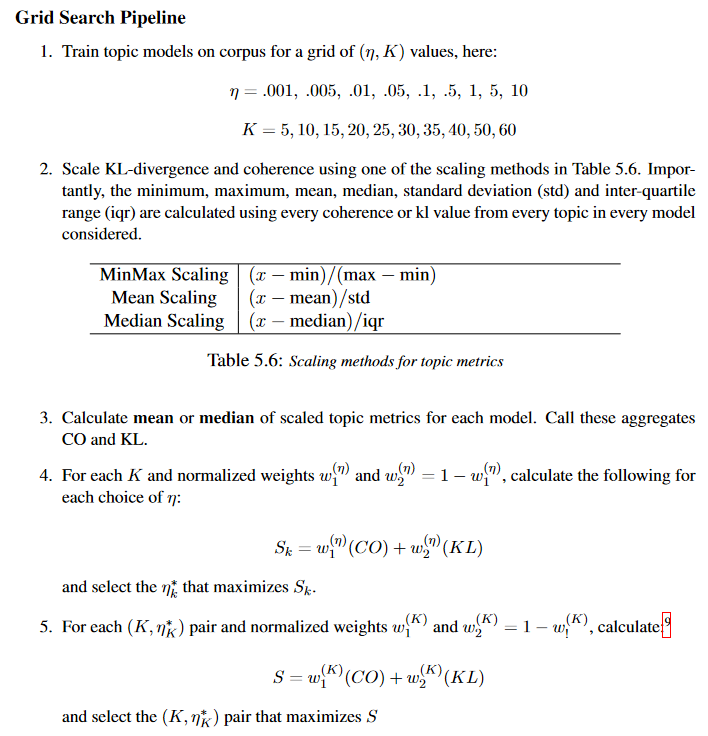


The output tells you the best $\eta$ for each $K$. You must specify which aggregation method, scaler, and weights you wish to use for the search. Specify (1,0) to use only coherence and (0,1) to use only KL divergence.

In [71]:
WeightedSearch = LdaGridSearch.WeightedEtaTopicsSearch(output = Output,
                                      scalertype = "median_scaler",
                                      aggregation_method = "median",
                                      eta_weights = (0.75,0.25),
                                      )
WeightedSearch

({2: {'num_topics': 2,
   'best_eta': 0.001,
   'best_combo_val': -0.05737521699244923,
   'best_model_summary': array([[-14.63744927,  -6.20374821],
          [  2.23478055,   2.39256167],
          [  1.07198083,   0.61725507],
          [  0.        ,   0.2       ]]),
   'best_model': <gensim.models.ldamodel.LdaModel at 0x2165bd6e188>,
   'etas': [0.001, 0.01, 0.1, 1],
   'combination_vals': array([-0.05737522, -0.06485823, -0.0926326 , -0.24883454]),
   'scalertype': 'median_scaler',
   'aggregation_method': 'median',
   'weights': (0.75, 0.25)},
  3: {'num_topics': 3,
   'best_eta': 0.1,
   'best_combo_val': 0.1879577179440977,
   'best_model_summary': array([[ -8.58926678,  -6.16651858, -12.36306257],
          [  2.34785652,   2.52206731,   2.42748904],
          [  1.0206573 ,   0.51992531,   1.00409325],
          [  0.        ,   0.2       ,   0.        ]]),
   'best_model': <gensim.models.ldamodel.LdaModel at 0x2165bd6ef88>,
   'etas': [0.001, 0.01, 0.1, 1],
   'combination_

Isolate the pairs:

In [72]:
LdaGridSearch.get_best_parameter_pairs(WeightedSearch)


[(2, 0.001), (3, 0.1), (4, 0.001)]

You can plug this output into the get_overall_best() function to get the best $K$

**option 1:** use same weights, aggregation method etc. as for the eta search:

In [73]:
LdaGridSearch.get_overall_best(output = WeightedSearch,
                               K_weights = None,
                               aggregation_method = None,
                               scalertype = None,
                               save_best = False)

{'best_K': 3,
 'best_eta': 0.1,
 'best_model_summary': array([[ -8.58926678,  -6.16651858, -12.36306257],
        [  2.34785652,   2.52206731,   2.42748904],
        [  1.0206573 ,   0.51992531,   1.00409325],
        [  0.        ,   0.2       ,   0.        ]]),
 'best_model': <gensim.models.ldamodel.LdaModel at 0x2165bd6ef88>,
 'K_weights': (0.75, 0.25),
 'combo_vals': [-0.05737521699244923, 0.1879577179440977, 0.09609793835236338],
 'all_model_rankings': array([3, 4, 2])}

**option 2**: specify your own method for $K$ search. Note that if you specify K_weights, you must specify aggregation method and scaler type. In that case, it uses the best_model_summary attributes of WeightedSearch, refits a scaler, and uses the K_weights to calculate the linear combinations. Note that while this means it is technically possible to use a different scaling or aggregation method for choosing $\eta$ or $K$ here, you would generally use the same one.

In [74]:
LdaGridSearch.get_overall_best(output = WeightedSearch,
                               K_weights = (0.90,0.10),
                               aggregation_method = "median",
                               scalertype = "median_scaler",
                               save_best = False)

{'best_K': 3,
 'best_eta': 0.1,
 'best_model_summary': array([[ -8.58926678,  -6.16651858, -12.36306257],
        [  2.34785652,   2.52206731,   2.42748904],
        [  1.0206573 ,   0.51992531,   1.00409325],
        [  0.        ,   0.2       ,   0.        ]]),
 'best_model': <gensim.models.ldamodel.LdaModel at 0x2165bd6ef88>,
 'K_weights': (0.9, 0.1),
 'combo_vals': array([-0.08542469,  0.16879123, -0.03389199]),
 'all_model_rankings': array([3, 4, 2])}

We've identified 3 as best -- which is good, since that is the truth.

### Visualizing role of weights

The problem with the above is that I arbitrarily choose weights. The following two plots allow you to visualize the impact of choosing different weights

For $\eta$, you do need to create a scaler object as below

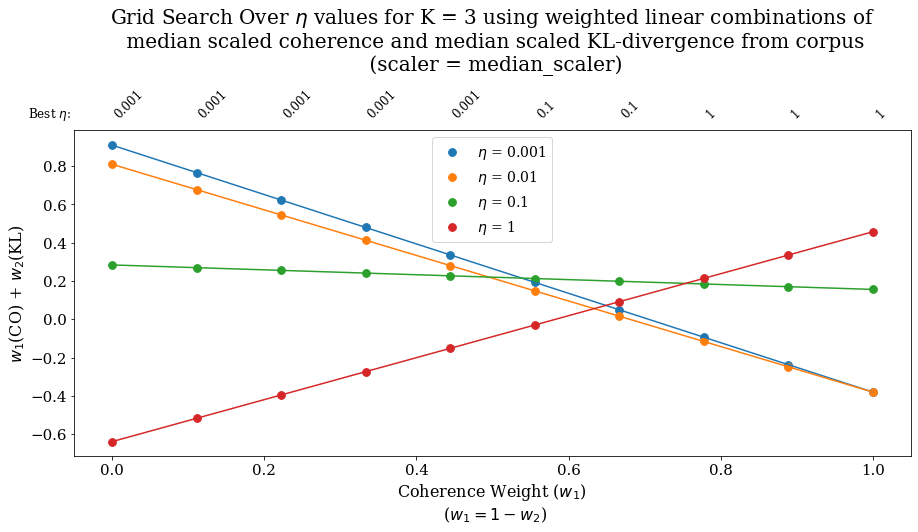

In [75]:
# Scaler object needs to be trained on all the output, even if a analysis of a particular Grid search over eta
# values for fixed K only uses output values for that K
output_scaler = LdaGridSearch.Scaler(LdaGridSearch._get_flat_values(Output, metric = "coherence"),
                           LdaGridSearch._get_flat_values(Output, metric = "kl"))


#Can visualize for an individual K
_ = LdaGridSearch.visualize_weighted_eta(output = Output[3],
                                      Scaler = output_scaler,
                                      scalertype = "median_scaler",
                                      aggregation_method = "median",
                                      num_weights = 10,
                                      zoom = 0,
                                      figsize = (15,6),
                                      set_figsize = True, 
                                      plot_legend = True, 
                                      plot_title = True,
                                      top_text_rotation = 45, 
                                      plot_annotation = True, 
                                      annotation_color = "black",
                                      plot_xlabel = True, 
                                      plot_ylabel = True,
                                      plot_short_title = True,
                                      save_fig = False)

Can also visualize these in a grid

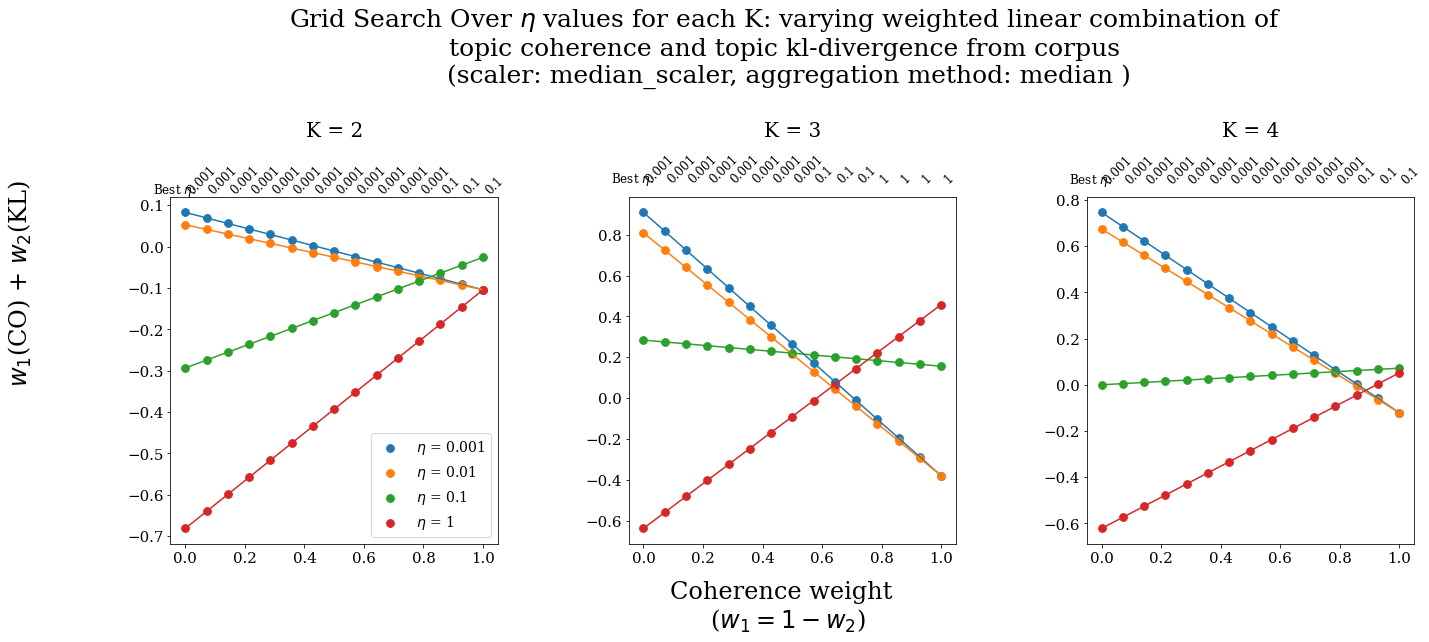

In [76]:
LdaGridSearch.visualize_weighted_eta_plots_grid(output = Output, 
                                                Kvals = [2,3,4],
                                                aggregation_method = "median",
                                                scalertype = "median_scaler",
                                                num_weights = 15, 
                                                zoom = 0,
                                                top_text_rotation = 45,
                                                save_fig = False)


You can see that adding a bit of KL divergence weight avoids selecting the highest $\eta$, which the scatterboxes below suggest might be poorer choices

Role of weight choice for $K$:
* you have the option here either to specify weights for $\eta$ to use throughout (recommended) or to use the same weights for choosing $\eta$ as you use for choosing $K$ at each point in the graph

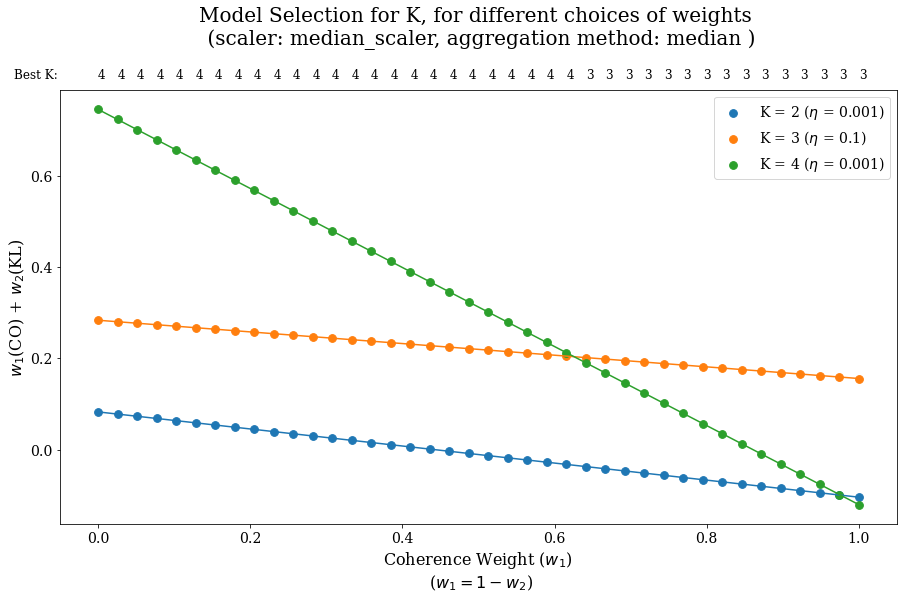

In [77]:
reload(LdaGridSearch)
out = LdaGridSearch.visualize_weighted_eta_topics(output = Output, 
                                                use_same_weights = False,
                                                eta_weights = (0.75,0.25),
                                                scalertype = "median_scaler",
                                                aggregation_method = "median", 
                                                num_weights = 40,
                                                zoom = 0,
                                                figsize = (15,8), 
                                                set_figsize = True, 
                                                plot_legend = True, 
                                                plot_title = True,
                                                save_fig = False)


**As I dicuss in the thesis, it isn't clear how to evaluate the plot above.**  In this simple example here, it is a good sign that we select $K=3$ for a fairly large range of weights around $w_1$ = 0.70-1. This is consistent with my finding in the thesis that we probably still want to rely on coherence to a large degree but that adding a touch of KL can help. Here, of course, it makes little difference and we could just use coherence, but then, this is a toy example with a ground truth. In the thesis, using only coherence leads to selection of too low $K$.


### Visualizing scatter boxes

The plots below help you visualize the per-topic distribution of topic metrics in each model. Although less formal than the weighted grid search, this method also helps avoid the need to make some choice of weight above and allows you to make an informed choice based on visual info about the nature of the model

For $\eta$ search and a fixed $K$.

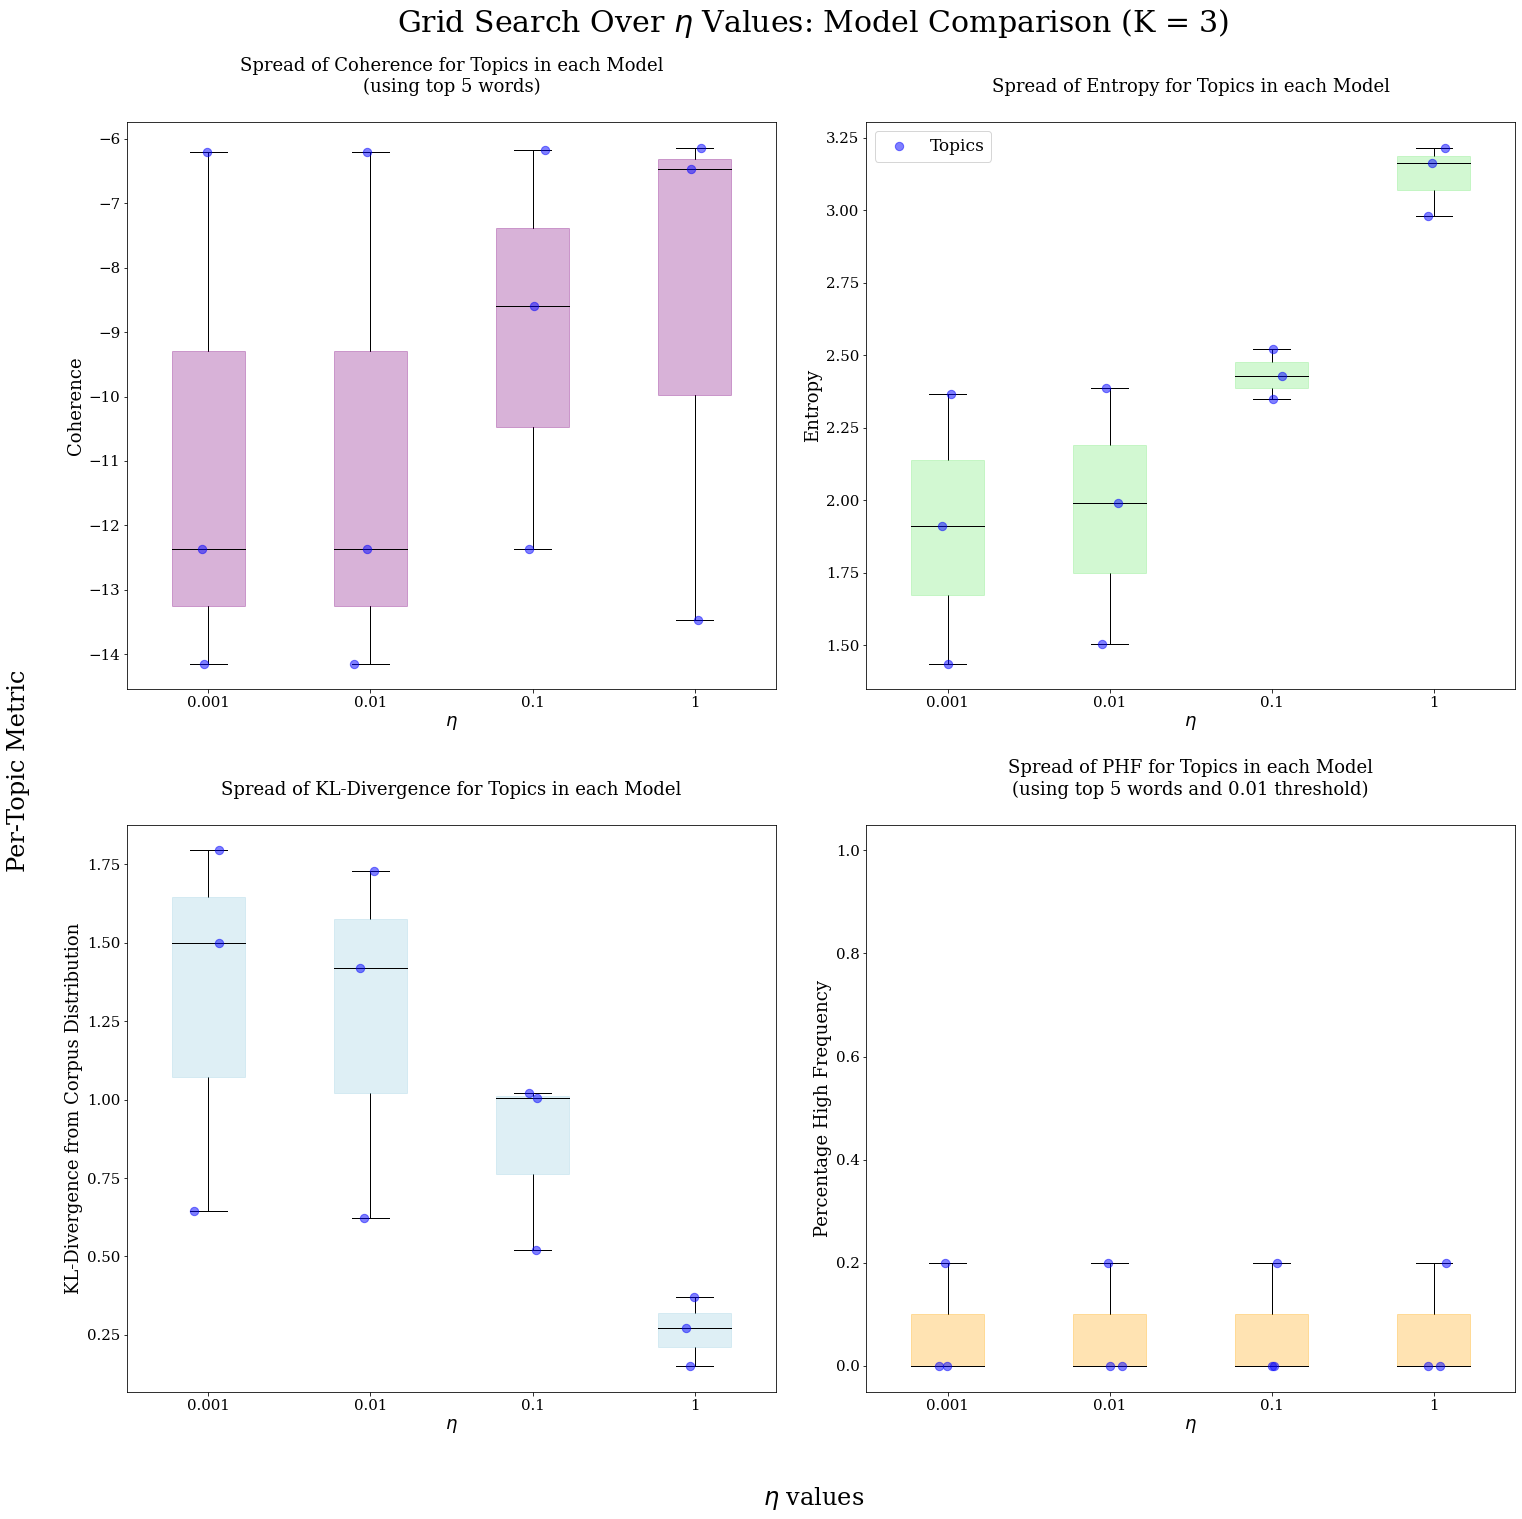

In [78]:
_ = LdaGridSearch.GridEta_scatterbox(Output[3],
                                     metric = "all",
                                     topn_phf = topn_phf,
                                     topn_coherence = topn_coherence,
                                     thresh = thresh,
                                     save_fig = False)

For $K$ search - note that this takes output from WeightedEtaTopicsSearch becuase requires a value for $\eta$ to be set for each model.

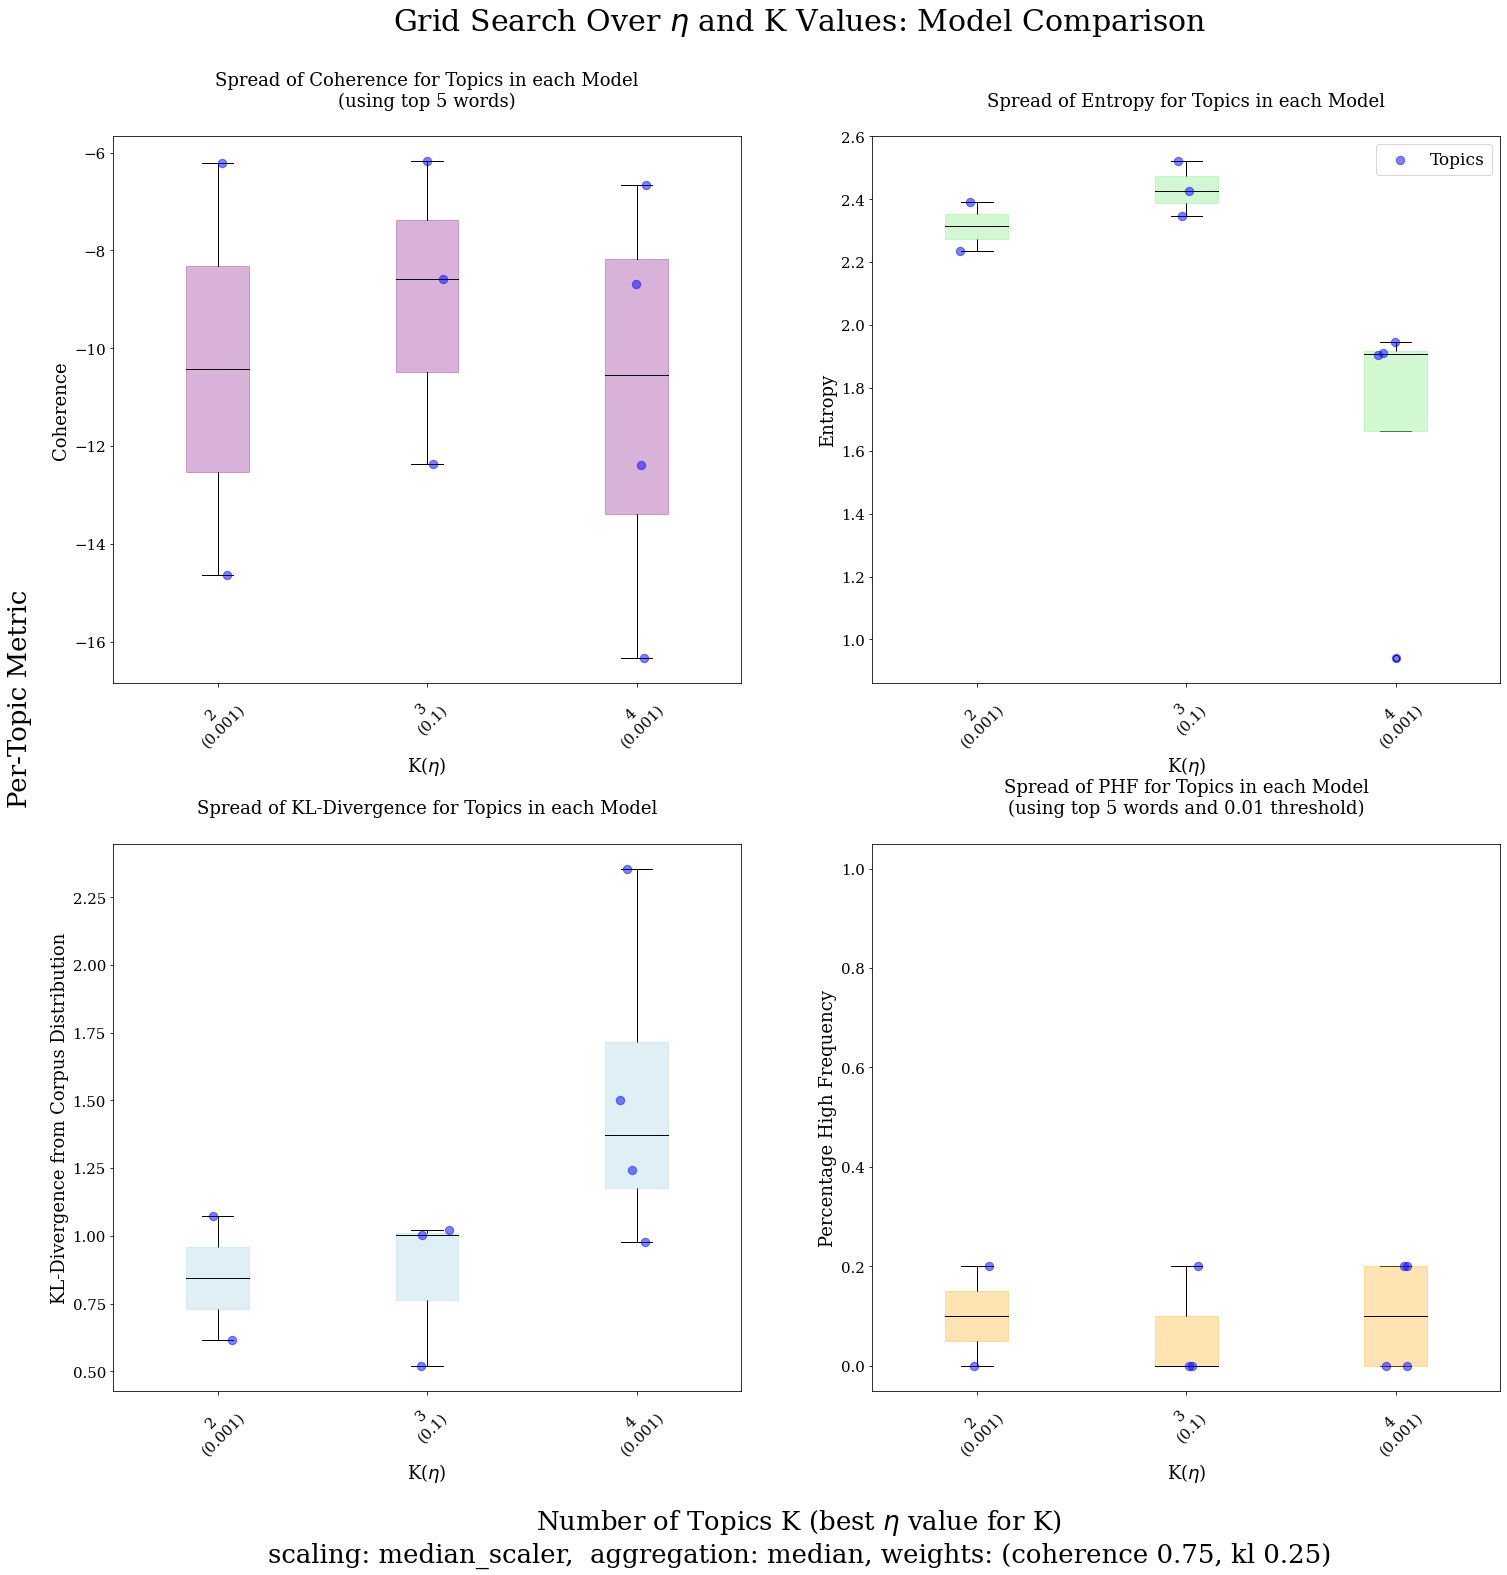

In [79]:
_ = LdaGridSearch.GridEtaTopics_scatterbox(WeightedSearch, 
                                           metric = "all", 
                                           topn_coherence = topn_coherence,
                                           topn_phf = topn_phf,
                                           thresh = thresh,
                                           xtick_rotation = 45,
                                           save_fig = False)

Notice how the 4-topic model seems to identify three topics with essentially the same coherence as the 3-Topic one and then learns one 'extra' lower-coherence topic.